In [51]:
#Import library pandas untuk membaca file .csv sebagai dataset
#Import library matplotlib.pyplot sebagai sarana visualisasi data klasifikasi
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#Membaca dataset menggunakan method read_csv dari library pandas
dataset = pd.read_csv('winequality-red.csv')

In [53]:
#Melihat daftar kolom yang ada 
print(dataset.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [54]:
#Melihat nilai mean(rata-rata), maximum, dan minimum dari setiap kolom
dataset.describe().loc[['min','max','mean']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023


In [77]:
#Melihat jenis-jenis kualitas yang ada dari dataset yang ada (1-10)(buruk-bagus)
quality_sort = dataset.quality.unique()
print(sorted(quality_sort))

[3, 4, 5, 6, 7, 8]


In [56]:
#Melihat nilai dari dataset dari indeks awal
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


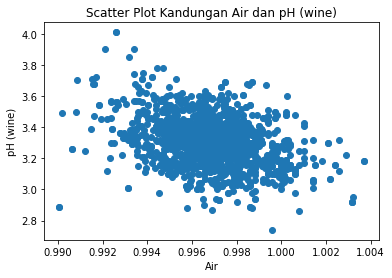

In [71]:
#melakukan visualisasi scatter dari dataset yang digunakan yaitu jumlah Air dan pH (wine) yang ada

d = dataset["density"]
ph = dataset["pH"]

plt.scatter(d, ph)
plt.title("Scatter Plot Kandungan Air dan pH (wine)")
plt.xlabel("Air")
plt.ylabel("pH (wine)")
plt.show()

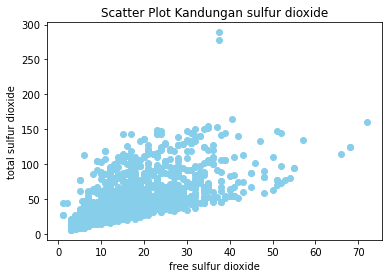

In [72]:
#melakukan visualisasi scatter dari dataset yang digunakan yaitu jumlah kandungan sulfur dioxide dan yang bebas sulfur dioxide
fsd = dataset["free sulfur dioxide"]
tsd = dataset["total sulfur dioxide"]

plt.scatter(fsd, tsd,color = 'skyblue')
plt.title("Scatter Plot Kandungan sulfur dioxide")
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.show()

In [59]:
#dari visualisasi data diatas maka input yang digunaka adalah jumlah pH(wine) dan jumlah kandungan sulfur dioxide dengan output quality
features = ['pH','total sulfur dioxide'] 

x = dataset[features]
y = dataset['quality'] 

In [70]:
#menggunakan library scikit-learn untuk melakukan klasifikasi data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [61]:
#meng-split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [78]:
#melakukan klasifikasi knn nilai k dari 1 hingga 20 dengan error rate sebagai penghitungnya
error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

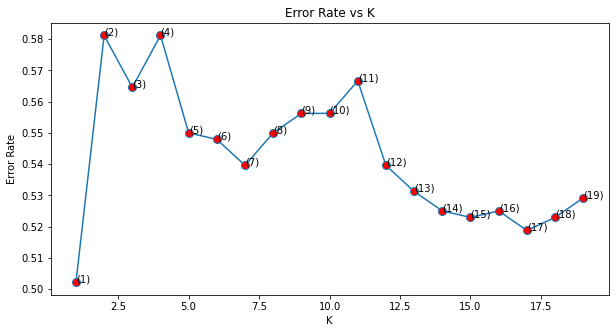

In [79]:
#Melakukan visualisasi data nilai k dengan persentasi error rate yang didapatkan dari klasifikasi knn
plt.figure(figsize = (10,5))
plt.plot(range(1, 20), error_rate, marker = 'o', markerfacecolor = 'red', markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
for i_x, i_y in zip(range(1,20), error_rate):
    plt.text(i_x, i_y, '({})'.format(round(i_x,2)))

In [80]:
#Menghitung persentasi akurasi klasifikasi knn dari nilai k yang memiliki error rate paling rendah yaitu k=1
knn_1 = KNeighborsClassifier(n_neighbors= 1)
knn_1.fit(x_train, y_train)
pred = knn_1.predict(x_test)

print('Tingkat akurasi menggunkan klasifikasi KNN adalah : ',100*accuracy_score(y_test,pred))

Tingkat akurasi menggunkan klasifikasi KNN adalah :  49.791666666666664
